In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Ordinary Differential Equation

## Introduction

In this section, we solve the following second-order ordinary differential equation (ODE) using the **finite difference method**:

$$
\frac{d^2u}{dx^2} + a\frac{du}{dx} = b
$$

where:
- u(x) is the unknown function to be solved,
- a and b are constants,
- x is the independent variable.

With the Dirichlet boundary conditions:

$$
u(0) = \alpha, \quad u(1) = \beta,
$$

The analytical solution is given as following:

$$
𝑢=𝑥+\frac{𝑒−𝑒^{(𝑥+1)}}{𝑒^{(𝑥+1)}−𝑒^𝑥}
$$

This equation arises in various physical and engineering applications, such as heat conduction, fluid flow, and mechanical vibrations.

In [23]:
def analytical(x,a=1,b=1,alpha=0,beta=0):
    """
    Computes the analytical solution for a given input x.
    
    The function is based on the equation:
    
        u(x) = x + (e - e^(x+1)) / (e^(x+1) - e^x)
    
    where e is the base of the natural logarithm (Euler's number).

    Parameters:
    -----------
    x : float or array-like
        The input value(s) at which the analytical solution is evaluated.

    Returns:
    --------
    float or numpy.ndarray
        The computed analytical solution for the given x.

    Notes:
    ------
    - This function utilizes NumPy's `exp()` function for numerical stability.
    - The denominator should not be zero; ensure valid inputs.

    Example:
    --------
    >>> analytical(0)
    1.0
    >>> analytical(np.array([0, 1, 2]))
    array([1. , 1. , 1. ])
    """

    c3 = (beta-b/a-alpha*np.exp(-a))/(1-np.exp(-a))
    c2 = (alpha-c3)*a**2

    return b/a*x+c2/a**2*np.exp(-a*x)+c3
    # return x+(np.exp(1)-np.exp(x+1))/(np.exp(x+1)-np.exp(x))

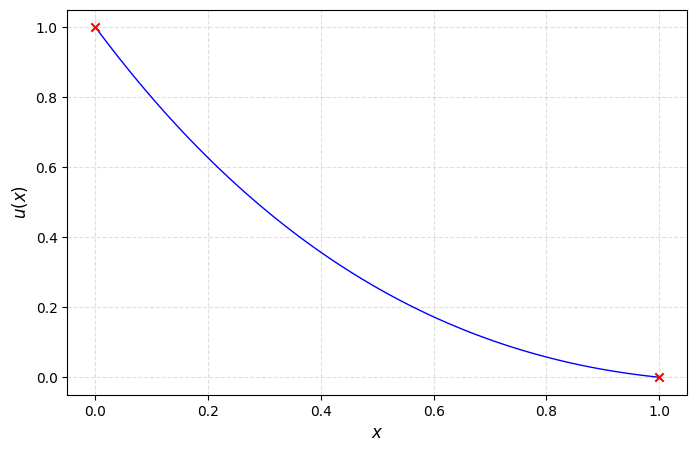

In [27]:
# Define boundary conditions
alpha,beta = 1,0

# Define x range
x = np.linspace(0,1,100)
u = analytical(x,alpha=alpha,beta=beta)

# Plotting results
plt.figure(figsize=(8, 5))
plt.plot(x,u,label='Domain Solution', color='b', linewidth=1)
plt.scatter([0, 1],[alpha,beta],marker='x',color='red',label='Boundary Conditions',zorder=3)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$u(x)$', fontsize=12)
# plt.title("Analytical Solution", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

## Discretization Using Finite Differences

To approximate the derivatives in the equation, we use the finite difference method. The **second derivative** and **first derivative** can be approximated as follows:

- **First derivative (First-Order Approximation):**
  
$$
\frac{du}{dx} \approx \frac{u_{i+1} - u_{i-1}}{2\Delta x}
$$

- **Second derivative (Central Difference Approximation):**
  
$$
\frac{d^2u}{dx^2} \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}
$$

Substituting these approximations into the differential equation results in a system of algebraic equations, which we solve numerically.

In [11]:
N = 4

In [12]:
dx = 1./N

In [13]:
m0 = 1/2/dx-3/dx**2
mm = -2/dx**2
mp = 1/dx**2+1/2/dx
mn = -1/2/dx+1/dx**2
mL = -3/dx**2-1/2/dx

In [14]:
A = np.zeros((N,N))
b = np.ones((N,1))

In [15]:
for i in range(N):
    if i==0:
        A[i,i] = m0
        A[i,i+1] = mp
    elif i==N-1:
        A[i,i] = mL
        A[i,i-1] = mn
    else:
        A[i,i-1] = mn
        A[i,i] = mm
        A[i,i+1] = mp

In [16]:
uc = np.linalg.solve(A,b)

In [17]:
xn = np.linspace(0,1,N+1)

In [18]:
xc = (xn[:-1]+xn[1:])/2

In [19]:
xc

array([0.125, 0.375, 0.625, 0.875])

NameError: name 'xc' is not defined

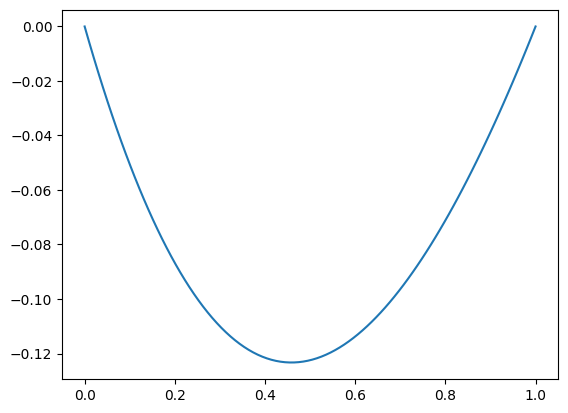

In [10]:
plt.plot(x,u)
plt.scatter(xc,uc)
plt.show()

In [13]:
def finite(N):
    """
    Solves a second-order finite difference equation with given coefficients.
    
    Parameters:
    N (int): Number of discretization points.

    Returns:
    xc (numpy.ndarray): Midpoints of the discretized domain.
    uc (numpy.ndarray): Solution of the finite difference equation.
    """
    # Step size
    dx = 1.0/N

    # Coefficients for the finite difference scheme
    m0 = 1/2/dx-3/dx**2            # Left boundary condition
    mm = -2/dx**2                  # Right boundary condition
    mp = 1/dx**2+1/2/dx            # Main diagonal (interior points)
    mn = -1/2/dx+1/dx**2           # Upper diagonal (i+1)
    mL = -3/dx**2-1/2/dx           # Lower diagonal (i-1) 

    # Initialize the coefficient matrix and right-hand side vector
    A = np.zeros((N,N))
    b = np.ones((N,1))

    # Construct the finite difference matrix
    for i in range(N):
        if i == 0:  # Left boundary
            A[i,i] = m0
            A[i,i+1] = mp
        elif i == N - 1:  # Right boundary
            A[i,i] = mL
            A[i,i-1] = mn
        else:  # Interior points
            A[i,i-1] = mn
            A[i,i] = mm
            A[i,i+1] = mp

    # Solve the linear system
    uc = np.linalg.solve(A,b)

    # Define grid points
    xn = np.linspace(0,1,N+1)  # Cell edges
    xc = (xn[:-1]+xn[1:])/2    # Cell centers

    return xc, uc

In [27]:
xc,uc = finite(20)

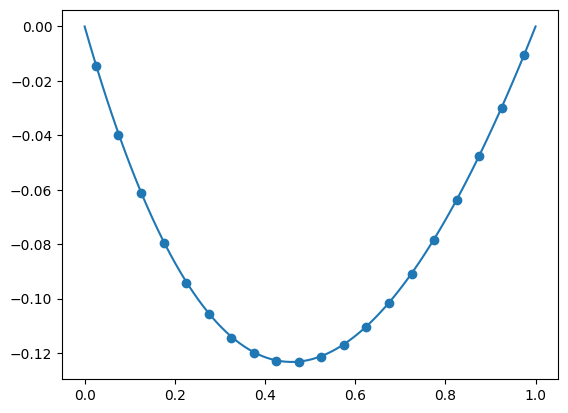

In [28]:
plt.plot(x,u)
plt.scatter(xc,uc)